#### About the Writer
Hello! My name is Kelly. I am the social media coordinator for Data Circles, and I will be a regular contributor to our Pandas Practice repo. I am not an expert programmer, but I am an expert learner, and this is a great way to force myself to branch out and practice a variety of pandas methods. 

#### About the Data
I downloaded a dataset about checkouts from the Seattle Public Library from Kaggle (insert link). 

#### About the Lesson
This is a basic introduction to window functions in Pandas. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Load data for 2016 checkouts 
checkouts = pd.read_csv('../data/Checkouts_By_Title_Data_Lens_2016.csv')

# Load library codes for more details about items checked out
lib_codes = pd.read_csv('../data/Integrated_Library_System__ILS__Data_Dictionary.csv')

In [3]:
# 
collections = lib_codes[lib_codes['Code Type'] == 'ItemCollection']

In [4]:
df = checkouts.merge( collections, how= 'inner', left_on= 'Collection', right_on= 'Code' )

In [5]:
# Filter dataframe to include only books
books = df[ df['Format Subgroup'] == 'Book']

In [6]:
random_indices = np.random.randint(0,books.shape[0], 100000)

In [7]:
books = books.iloc[random_indices].copy()

In [8]:
books['CheckoutDateTime'] = pd.to_datetime(books.CheckoutDateTime)

In [9]:
books['checkout_month'] = books.CheckoutDateTime.dt.month
books['checkout_date'] = books.CheckoutDateTime.dt.date

In [10]:
books.head()

,BibNumber,ItemBarcode,ItemType,Collection,CallNumber,CheckoutDateTime,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup,checkout_month,checkout_date
1228600,2269521,10047636682,acbk,canf,306.7 P2494L 2004,2016-01-28 19:18:00,canf,CA-Nonfiction,ItemCollection,Print,Book,Nonfiction,NaN,1,2016-01-28
2614601,3047275,10085637410,acbk,nanf,598.944 M1454M 2014,2016-05-12 17:14:00,nanf,NA-Nonfiction,ItemCollection,Print,Book,Nonfiction,NaN,5,2016-05-12
5553416,3099663,10085430923,jcbk,nccomic,J741.5973 Si582U 2015,2016-04-28 16:22:00,nccomic,NC-Children's Comics,ItemCollection,Print,Book,Fiction,NaN,4,2016-04-28
1518284,1888344,10035969467,acbk,canf,306.74097 DELANY 1999,2016-08-03 11:44:00,canf,CA-Nonfiction,ItemCollection,Print,Book,Nonfiction,NaN,8,2016-08-03
5718326,2447546,10057230459,jcbk,ccfic,J LAWRENC,2016-05-26 14:28:00,ccfic,CC-Children's Fiction,ItemCollection,Print,Book,Fiction,NaN,5,2016-05-26


In [11]:
books['checkout_week'] = books.CheckoutDateTime.dt.week

In [12]:
book_df = books[['BibNumber', 'Category Group', 'checkout_date', 'checkout_month']]

In [13]:
book_df = book_df[book_df['Category Group'].notna()]

In [14]:
book_df.groupby(['Category Group'])['BibNumber'].count()

Category Group
Fiction       51303
Language       1571
Nonfiction    33153
Reference        80
Name: BibNumber, dtype: int64

In [135]:
book_df.to_csv('../mini_data/window_func.csv')

In [15]:
fiction = book_df[book_df['Category Group'] == 'Fiction'].groupby(['checkout_date'])['BibNumber'].count()
nonfiction = book_df[book_df['Category Group'] == 'Nonfiction'].groupby(['checkout_date'])['BibNumber'].count()
language = book_df[book_df['Category Group'] == 'Language'].groupby(['checkout_date'])['BibNumber'].count()

In [16]:
df = pd.DataFrame({'fiction':fiction, 'nonfiction':nonfiction, 'language':language})

In [17]:
df2 = pd.DataFrame({'daily': fiction, 'roll_3' : fiction.rolling(3).mean(), 'expand': fiction.expanding().mean()})

In [18]:
roll_3 = fiction.rolling(3).mean()
roll_7 = fiction.rolling(7).mean()
expand = fiction.expanding().mean()

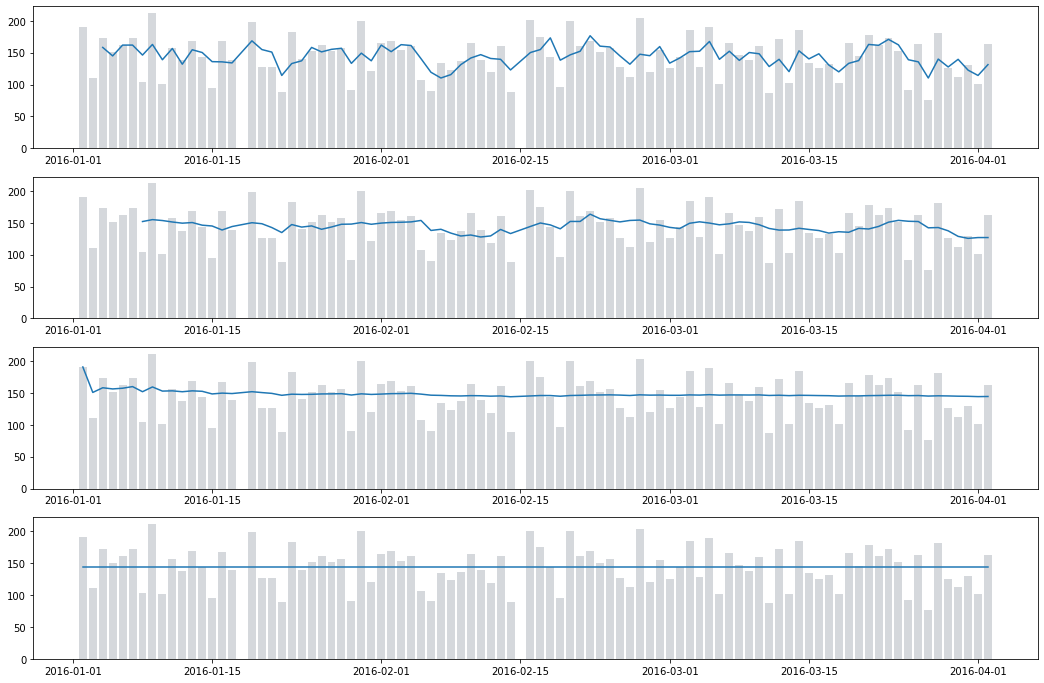

In [132]:
fig, axs = plt.subplots(4,1, figsize=(18,12))

m = np.ones(90)
m = m * fiction[:90].mean()
mean_line = pd.Series(m, index=fiction[:90].index)

lines = [roll_3[:90], roll_7[:90], expand[:90], mean_line]

for idx, ax in enumerate(axs.flatten()):
    ax.bar(fiction[:90].index, fiction[:90].values, color='#D5D8DC')
    ax.plot(lines[idx])